In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\sherl\AppData\Local\Temp\ipykernel_38372\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import data
df= pd.read_csv('medical_examination.csv')

In [3]:
less = df[df['cholesterol']<1]
less

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Add overweight column
df['overweight'] = (df['weight'] / np.square(df['height']/100) > 25).astype('int') 
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [6]:
# Normalize the data by making 0 always good and 1 always bad
df['gluc'] = (df['gluc'] != 1 ).astype('uint8')
df['cholesterol'] = (df['cholesterol'] != 1).astype('uint8')

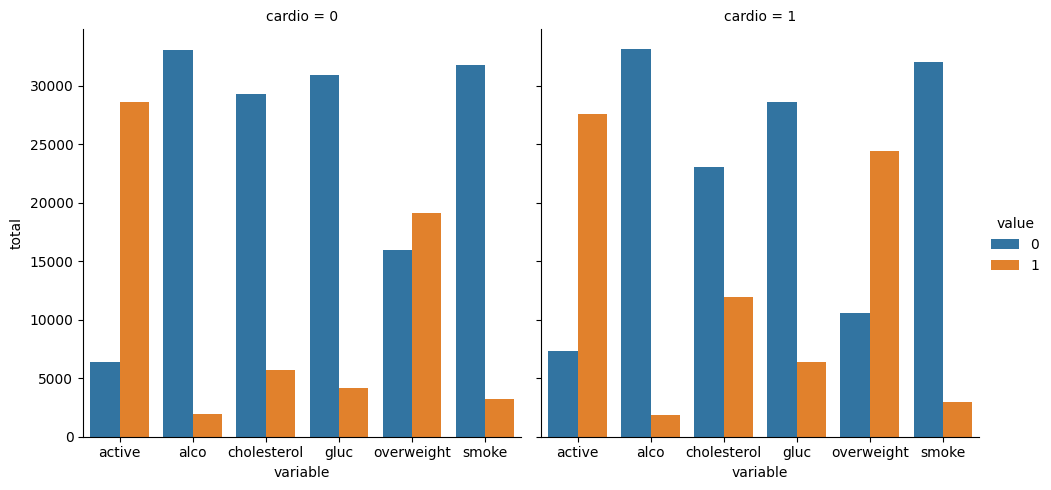

In [7]:
def draw_cardio_plot():
    columns = ['active','alco','cholesterol','gluc','overweight','smoke']
    df_cardio = pd.melt(df, id_vars=['cardio'], value_vars=columns)

    df_cardio = df_cardio.reset_index().groupby(['variable', 'cardio', 'value']).agg('count').rename(columns = {'index':'total'}).reset_index()

    fig = sns.catplot(x='variable', y='total', col='cardio', hue='value', data=df_cardio, kind='bar').fig
    
    fig.savefig('cardioplot.png')
draw_cardio_plot()
#sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker").fig

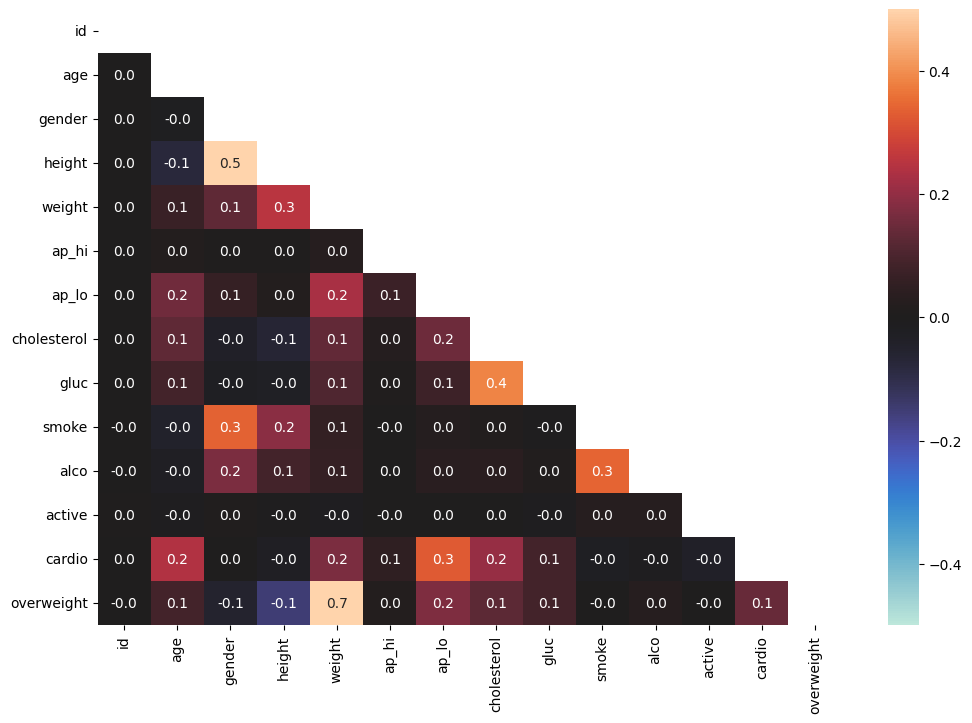

In [11]:
def draw_heat_map():
    df_heat = df [
         (df['ap_lo'] <= df['ap_hi'])
        &(df['height']>= df['height'].quantile(0.025))
        &(df['height']<= df['height'].quantile(0.975))
        &(df['weight']>=df['weight'].quantile(0.025))
        &(df['weight']<=df['weight'].quantile(0.975))]

    # Create the correlation matrix
    corr = df_heat.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))

    # Set up the matplotlib figure
    fig = plt.figure(figsize=(12, 8))

    # Draw the heatmap with sns.heatmap
    sns.heatmap(corr, mask=mask, annot=True,
                fmt='.1f', center=0, vmin=-0.5, vmax=0.5)
    
    #Do not modify the next two lines 
    fig.savefig('heatmap.png')

draw_heat_map()
